In [27]:
import requests
import pandas as pd
import numpy as np
import subprocess
import pdb
from dateutil.parser import parse
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline  

In [28]:
path = "data/discharge15s.csv"
df = pd.read_csv(path)
df["timestamp"] = map(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M'), df['timestamp'])

In [40]:
begin = datetime.strptime("2011-8-1", '%Y-%m-%d')
end = datetime.strptime("2011-10-20", '%Y-%m-%d')

In [51]:

cleaned = df[(df['timestamp'] >= begin) & (df['timestamp'] <= end) & (df['discharge'] != 'Eqp')]


In [53]:
cleaned

,Unnamed: 0,timestamp,discharge
0,0,2011-08-06 00:00:00,967
1,1,2011-08-06 00:15:00,832
2,2,2011-08-06 00:30:00,764
3,3,2011-08-06 00:45:00,1030
4,4,2011-08-06 01:00:00,1640
5,5,2011-08-06 01:15:00,696
6,6,2011-08-06 01:30:00,427
7,7,2011-08-06 01:45:00,1030
8,8,2011-08-06 02:00:00,1770
9,9,2011-08-06 02:15:00,1640


In [54]:
discharge = np.array(cleaned['discharge'])

In [57]:
discharge = [int(x) for x in discharge]

In [84]:
areas2 = [discharge[0] * 15]
for i in range(1, len(discharge)):
    areas2 += [areas[i - 1] + discharge[i] * 15]

In [85]:
areas = []
for i in range(0, len(discharge)):
    areas += [np.trapz(discharge[:i], dx=15)]

In [86]:
areas[len(areas)-2]

2080246807.5

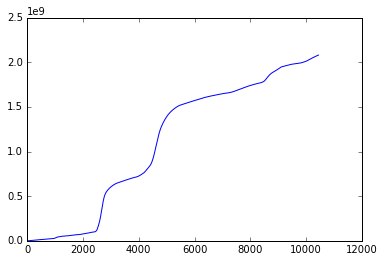

In [87]:
plt.plot(areas)

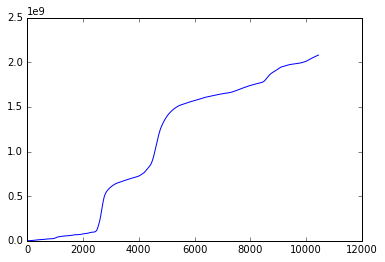

In [88]:
plt.plot(areas2)

In [89]:
cleaned['volume'] = areas

C:\Users\Emily\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
cleaned.to_csv("data/discharge_with_volume.csv")


52.5